# Airbnb Data Cleaning

In [16]:
#load in data
import pandas as pd
#check the version of pandas
print(pd.__version__)
df_airbnb = data = pd.read_csv('/Users/charleschen/Desktop/data for fun/listings.csv', encoding = "ISO-8859-1")
df_airbnb.head()

0.20.3


,id,scrape_id,last_scraped,name,picture_url,host_id,host_name,host_since,host_picture_url,street,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count
0,1069266,2.020000e+13,1/2/15,Stay like a real New Yorker!,https://a0.muscache.com/pictures/50276484/larg...,5867023,Michael,4/10/13,https://a2.muscache.com/ic/users/5867023/profi...,"East 53rd Street, New York, NY 10022, United S...",...,4/28/13,12/17/14,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1
1,1846722,2.020000e+13,1/2/15,Apartment 20 Minutes Times Square,https://a1.muscache.com/pictures/35865039/larg...,2631556,Denise,6/13/12,https://a2.muscache.com/ic/users/2631556/profi...,"West 155th Street, New York, NY, United States",...,1/5/14,12/29/14,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2
2,2061725,2.020000e+13,1/2/15,Option of 2 Beds w Private Bathroom,https://a2.muscache.com/pictures/50650147/larg...,4601412,Miao,1/5/13,https://a0.muscache.com/ic/users/4601412/profi...,"Van Buren Street, Brooklyn, NY 11221, United S...",...,2/4/14,12/29/14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4
3,44974,2.020000e+13,1/3/15,Charming Bright West Village Studio,https://a1.muscache.com/pictures/20489905/larg...,198425,Sara,8/11/10,https://a0.muscache.com/ic/users/198425/profil...,"Greenwich Ave, New York, NY 10011, United States",...,10/8/10,10/30/14,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1
4,4701675,2.020000e+13,1/2/15,Charming Apartment in Chelsea,https://a2.muscache.com/pictures/60588955/larg...,22590025,Charles,10/15/14,https://a2.muscache.com/ic/users/22590025/prof...,"West 22nd Street, New York, NY 10011, United S...",...,12/8/14,12/8/14,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1


In [17]:
# too many column, print out all column names, and select ones that are suitable for analysis
print(df_airbnb.columns)

Index(['id', 'scrape_id', 'last_scraped', 'name', 'picture_url', 'host_id',
       'host_name', 'host_since', 'host_picture_url', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_listing_count'],
      dtype='object')


In [18]:
use_cols = [
    'id',
    'host_id',
    'zipcode',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]
df_airbnb = df_airbnb[use_cols]
df_airbnb.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,host_listing_count,availability_30,minimum_nights,bathrooms
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,$160.00,62,86.0,1,21,3,1.0
1,1846722,2631556,NaN,Apartment,Entire home/apt,10,3.0,3.0,Real Bed,$105.00,22,85.0,2,28,1,1.0
2,2061725,4601412,11221,Apartment,Private room,2,1.0,2.0,Real Bed,$58.00,35,98.0,4,4,3,1.0
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,$185.00,26,96.0,1,1,10,1.0
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,2.0,Real Bed,$195.00,1,100.0,1,30,1,1.0


In [19]:
# check null number in the dataset
for i in use_cols:
    n = len(df_airbnb[i][df_airbnb[i].isnull()])
    print(i, ': ', str(n))

id :  0
host_id :  0
zipcode :  162
property_type :  6
room_type :  0
accommodates :  0
bedrooms :  140
beds :  98
bed_type :  0
price :  0
number_of_reviews :  0
review_scores_rating :  8657
host_listing_count :  0
availability_30 :  0
minimum_nights :  0
bathrooms :  463


In [20]:
# Remove NaN values from dataframe except review_scores_rating
nrows_original = len(df_airbnb)
df = df_airbnb.dropna(how = 'any', subset = use_cols.remove('review_scores_rating'))
print(str(nrows_original - len(df)), 'has been removed from dataset')

9258 has been removed from dataset


In [21]:
df.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,host_listing_count,availability_30,minimum_nights,bathrooms
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,$160.00,62,86.0,1,21,3,1.0
2,2061725,4601412,11221,Apartment,Private room,2,1.0,2.0,Real Bed,$58.00,35,98.0,4,4,3,1.0
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,$185.00,26,96.0,1,1,10,1.0
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,2.0,Real Bed,$195.00,1,100.0,1,30,1,1.0
5,68914,343302,11231,Apartment,Entire home/apt,6,2.0,3.0,Real Bed,$165.00,16,96.0,2,11,2,1.0


In [22]:
df.shape

(18134, 16)

In [23]:
# Convert formatting for price from $1.00 into a float of 1.00
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype('float')
df.head()

/Users/charleschen/Desktop/Python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,host_id,zipcode,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,host_listing_count,availability_30,minimum_nights,bathrooms
0,1069266,5867023,10022-4175,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,160.0,62,86.0,1,21,3,1.0
2,2061725,4601412,11221,Apartment,Private room,2,1.0,2.0,Real Bed,58.0,35,98.0,4,4,3,1.0
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,185.0,26,96.0,1,1,10,1.0
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,2.0,Real Bed,195.0,1,100.0,1,30,1,1.0
5,68914,343302,11231,Apartment,Entire home/apt,6,2.0,3.0,Real Bed,165.0,16,96.0,2,11,2,1.0


In [24]:
for i in df.columns:
    print(str(i), ':', df[i].dtypes)

id : int64
host_id : int64
zipcode : object
property_type : object
room_type : object
accommodates : int64
bedrooms : float64
beds : float64
bed_type : object
price : float64
number_of_reviews : int64
review_scores_rating : float64
host_listing_count : int64
availability_30 : int64
minimum_nights : int64
bathrooms : float64


In [25]:
# convert zipcode to 5 digits
df['zipcode'] = df['zipcode'].str.replace(r'-\d+', '')
df.head()

/Users/charleschen/Desktop/Python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,host_id,zipcode,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,host_listing_count,availability_30,minimum_nights,bathrooms
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,160.0,62,86.0,1,21,3,1.0
2,2061725,4601412,11221,Apartment,Private room,2,1.0,2.0,Real Bed,58.0,35,98.0,4,4,3,1.0
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,185.0,26,96.0,1,1,10,1.0
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,2.0,Real Bed,195.0,1,100.0,1,30,1,1.0
5,68914,343302,11231,Apartment,Entire home/apt,6,2.0,3.0,Real Bed,165.0,16,96.0,2,11,2,1.0


In [26]:
# remove invalid values
df = df[df['accommodates'] > 0]
df = df[df['bedrooms'] > 0]
df = df[df['beds'] > 0]
df = df[df['price'] > 0]
df = df[df['review_scores_rating'] >= 0]
df = df[df['minimum_nights'] > 0]
df = df[df['bathrooms'] >= 0]

(array([1.6364e+04, 2.0700e+02, 1.0000e+01, 1.0000e+00, 2.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  10.,  509., 1008., 1507., 2006., 2505., 3004., 3503., 4002.,
        4501., 5000.]),
 <a list of 10 Patch objects>)

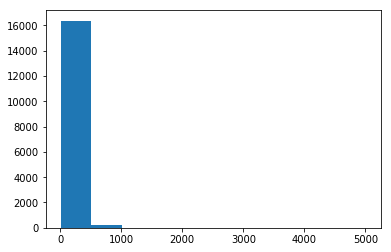

In [37]:
# EDA
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.hist(df['price'])

Text(0,0.5,'frequency')

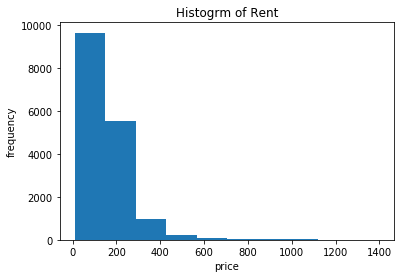

In [48]:
# visulize price betwen 0 and 1500
plt.hist(df['price'][(df['price'] > 0) & (df['price'] < 1500)])
plt.title('Histogrm of Rent')
plt.xlabel('price')
plt.ylabel('frequency')

Text(0,0.5,'frequency')

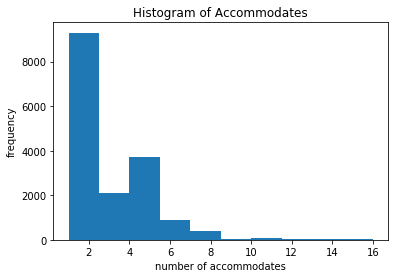

In [47]:
plt.hist(df['accommodates'])
plt.title('Histogram of Accommodates')
plt.xlabel('number of accommodates')
plt.ylabel('frequency')

Text(0,0.5,'frequency')

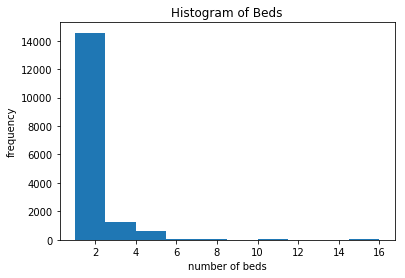

In [50]:
plt.hist(df['beds'])
plt.title('Histogram of Beds')
plt.xlabel('number of beds')
plt.ylabel('frequency')

(array([1.9000e+01, 2.0000e+00, 2.2000e+01, 1.7000e+01, 1.1000e+01,
        2.1100e+02, 3.0100e+02, 1.5620e+03, 4.0740e+03, 1.0371e+04]),
 array([ 20.,  28.,  36.,  44.,  52.,  60.,  68.,  76.,  84.,  92., 100.]),
 <a list of 10 Patch objects>)

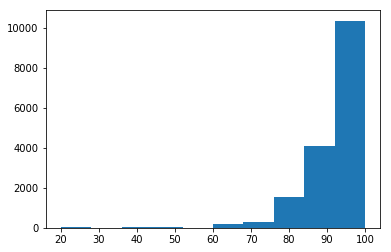

In [51]:
plt.hist(df['review_scores_rating'])

(array([1.000e+00, 0.000e+00, 1.500e+01, 1.110e+02, 5.310e+02, 1.268e+03,
        2.644e+03, 3.443e+03, 3.039e+03, 2.813e+03, 1.759e+03, 5.360e+02,
        2.490e+02, 1.140e+02, 4.900e+01, 8.000e+00, 1.000e+00, 5.000e+00,
        2.000e+00, 2.000e+00]),
 array([2.30258509, 2.6133155 , 2.9240459 , 3.23477631, 3.54550671,
        3.85623712, 4.16696752, 4.47769793, 4.78842833, 5.09915874,
        5.40988914, 5.72061955, 6.03134995, 6.34208036, 6.65281076,
        6.96354117, 7.27427157, 7.58500198, 7.89573238, 8.20646279,
        8.51719319]),
 <a list of 20 Patch objects>)

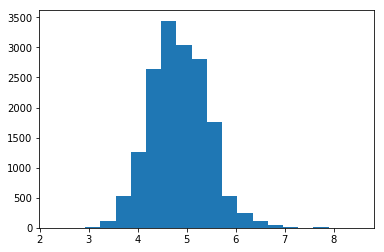

In [55]:
# All data seems highly skewed, make a log transformation on them
plt.hist(np.log(df['price']), bins=20)

(array([1.501e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.798e+03,
        0.000e+00, 2.092e+03, 0.000e+00, 0.000e+00, 3.017e+03, 6.980e+02,
        8.740e+02, 0.000e+00, 1.550e+02, 2.650e+02, 8.200e+01, 4.200e+01,
        3.000e+00, 6.300e+01]),
 array([0.        , 0.13862944, 0.27725887, 0.41588831, 0.55451774,
        0.69314718, 0.83177662, 0.97040605, 1.10903549, 1.24766493,
        1.38629436, 1.5249238 , 1.66355323, 1.80218267, 1.94081211,
        2.07944154, 2.21807098, 2.35670041, 2.49532985, 2.63395929,
        2.77258872]),
 <a list of 20 Patch objects>)

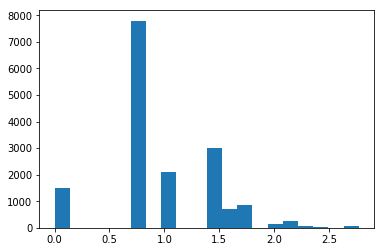

In [57]:
plt.hist(np.log(df['accommodates']), bins=20)

(array([1.0793e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.7660e+03, 0.0000e+00, 1.2390e+03, 0.0000e+00, 0.0000e+00,
        4.2000e+02, 1.7800e+02, 8.2000e+01, 0.0000e+00, 3.0000e+01,
        1.7000e+01, 1.9000e+01, 1.0000e+01, 1.0000e+00, 3.5000e+01]),
 array([0.        , 0.13862944, 0.27725887, 0.41588831, 0.55451774,
        0.69314718, 0.83177662, 0.97040605, 1.10903549, 1.24766493,
        1.38629436, 1.5249238 , 1.66355323, 1.80218267, 1.94081211,
        2.07944154, 2.21807098, 2.35670041, 2.49532985, 2.63395929,
        2.77258872]),
 <a list of 20 Patch objects>)

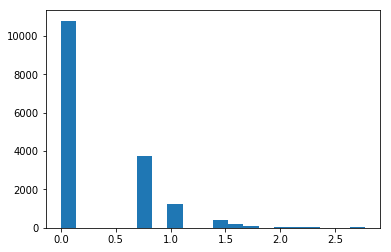

In [58]:
plt.hist(np.log(df['beds']), bins=20)

In [68]:
# make dummy varibales for future analysis
df.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,host_listing_count,availability_30,minimum_nights,bathrooms
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,160.0,62,86.0,1,21,3,1.0
2,2061725,4601412,11221,Apartment,Private room,2,1.0,2.0,Real Bed,58.0,35,98.0,4,4,3,1.0
3,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,185.0,26,96.0,1,1,10,1.0
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,2.0,Real Bed,195.0,1,100.0,1,30,1,1.0
5,68914,343302,11231,Apartment,Entire home/apt,6,2.0,3.0,Real Bed,165.0,16,96.0,2,11,2,1.0


In [92]:
property_dummy = pd.core.frame.DataFrame(pd.get_dummies(df['room_type']))
property_dummy['id'] = df['id']
property_dummy.head()

,Entire home/apt,Private room,Shared room,id
0,1,0,0,1069266
2,0,1,0,2061725
3,1,0,0,44974
4,1,0,0,4701675
5,1,0,0,68914


In [93]:
room_type_dummy = pd.core.frame.DataFrame(pd.get_dummies(df['room_type']))
room_type_dummy['id'] = df['id']
room_type_dummy.head()

,Entire home/apt,Private room,Shared room,id
0,1,0,0,1069266
2,0,1,0,2061725
3,1,0,0,44974
4,1,0,0,4701675
5,1,0,0,68914


In [91]:
bed_type_dummy = pd.core.frame.DataFrame(pd.get_dummies(df['bed_type']))
bed_type_dummy['id'] = df['id']
bed_type_dummy.head()

,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,id
0,0,0,0,0,1,1069266
2,0,0,0,0,1,2061725
3,0,0,0,0,1,44974
4,0,0,0,0,1,4701675
5,0,0,0,0,1,68914


In [98]:
# Merge all dataframe to a whole dataset
whole_df = pd.merge(df, property_dummy, on='id')
whole_df = pd.merge(whole_df, room_type_dummy, on='id')
whole_df = pd.merge(whole_df, bed_type_dummy, on='id')
whole_df.columns

Index(['id', 'host_id', 'zipcode', 'property_type', 'room_type',
       'accommodates', 'bedrooms', 'beds', 'bed_type', 'price',
       'number_of_reviews', 'review_scores_rating', 'host_listing_count',
       'availability_30', 'minimum_nights', 'bathrooms', 'Entire home/apt_x',
       'Private room_x', 'Shared room_x', 'Entire home/apt_y',
       'Private room_y', 'Shared room_y', 'Airbed', 'Couch', 'Futon',
       'Pull-out Sofa', 'Real Bed'],
      dtype='object')

In [99]:
whole_df.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,...,Private room_x,Shared room_x,Entire home/apt_y,Private room_y,Shared room_y,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,160.0,...,0,0,1,0,0,0,0,0,0,1
1,2061725,4601412,11221,Apartment,Private room,2,1.0,2.0,Real Bed,58.0,...,1,0,0,1,0,0,0,0,0,1
2,44974,198425,10011,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,185.0,...,0,0,1,0,0,0,0,0,0,1
3,4701675,22590025,10011,Apartment,Entire home/apt,2,1.0,2.0,Real Bed,195.0,...,0,0,1,0,0,0,0,0,0,1
4,68914,343302,11231,Apartment,Entire home/apt,6,2.0,3.0,Real Bed,165.0,...,0,0,1,0,0,0,0,0,0,1
